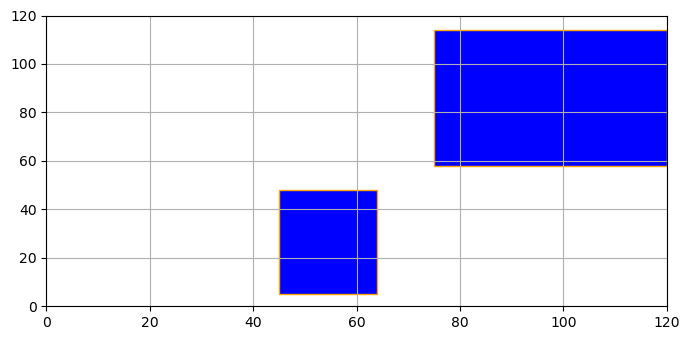

party!
{'idx': 0, 'xmin': 45, 'ymin': 5, 'width': 19, 'height': 43, 'clashes': {}, 'aversions': {}, 'inference': 0, 'connections': {}, 'turmoil': 0, 'wounds': []}
{'idx': 0, 'xmin': 75, 'ymin': 58, 'width': 45, 'height': 56, 'clashes': {}, 'aversions': {}, 'inference': 0, 'connections': {}, 'turmoil': 0, 'wounds': []}


14400

In [1]:
from util import *

# a = generate_participant()

arena = {}

layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 120,
               "height" : 120}

for i in range(2):
    arena[str(i)] = generate_participant()

plot_participants(arena)

a = calculate_overlap(arena['0'], arena['1'])

print(arena['0'])
print(arena['1'])

calculate_layout_area(layout_zone)

calculate_leeway_coefficient(layout_zone, arena)

NameError: name '_calculate_layout_area' is not defined

In [ ]:
superior_dict = {
    'dict1': {'key1': 'value1', 'key2': 1, 'key3': 2},
    'dict2': {'key1': 'value4', 'key2': 5, 'key3': 2},
    'dict3': {'key1': 'value7', 'key2': 1, 'key3': 2},
}

key_to_retrieve = 'key2'

width = [sub_dict.get(key_to_retrieve) for sub_dict in superior_dict.values()]

key_to_retrieve = 'key3'

height = [sub_dict.get(key_to_retrieve) for sub_dict in superior_dict.values()]

area = sum([a * b for a, b in zip(width, height)])

print(area)